# Import The DataSet And Library

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
df = load_breast_cancer()
d

NameError: name 'd' is not defined

In [ ]:
df.keys()

In [ ]:
df['data'].shape

In [ ]:
df['target'].shape

In [ ]:
df['feature_names'].shape

In [ ]:
np.append(df['feature_names'],[['target']])

# Make DataFrame In Breast Cancer

In [ ]:
df_cancer = pd.DataFrame(np.c_[df['data'],df['target']],columns=np.append(df['feature_names'],[['target']]))

df_cancer.head()

# Data Visualization

In [ ]:
sns.pairplot(df_cancer, hue='target',vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness'])
plt.show()

#  Model The Training

In [78]:
from sklearn.svm import SVC

In [79]:
model = SVC()

In [80]:
from sklearn.model_selection import train_test_split
x = df_cancer.drop(['target'],axis=1)
y = df_cancer['target']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=5)

In [81]:
x_train.shape

(455, 30)

In [82]:
x_test.shape

(114, 30)

In [83]:
model.fit(x_train,y_train)

C:\Users\Aman\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

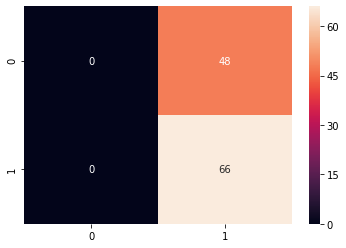

In [84]:
from sklearn.metrics import confusion_matrix,classification_report

y_pred = model.predict(x_test)

cf = confusion_matrix(y_test,y_pred)

sns.heatmap(cf, annot=True)

plt.show()

# Improving The Model Part 1

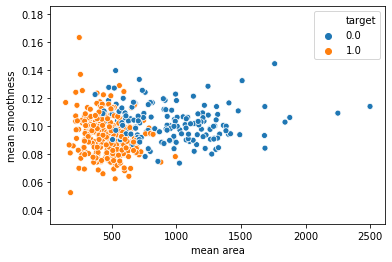

In [85]:
sns.scatterplot('mean area','mean smoothness',data=x_train,hue=y_train)
plt.show()

In [86]:
x_train_scaled = (x_train -  x_train.min())/(x_train.max()-x_train.min())
x_test_scaled = (x_test -  x_test.min())/(x_test.max()-x_test.min())

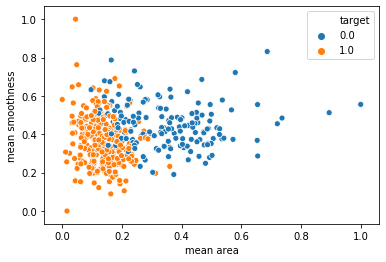

In [87]:
sns.scatterplot('mean area','mean smoothness',data=x_train_scaled,hue=y_train)
plt.show()

C:\Users\Aman\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


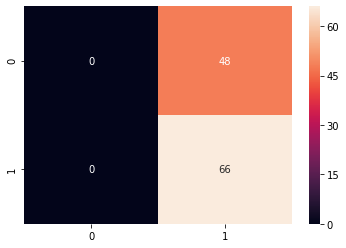

In [88]:
model1 = SVC()
model1.fit(x_train_scaled,y_train)

y_pred1 = model.predict(x_test_scaled)

cf1 = confusion_matrix(y_test,y_pred1)

sns.heatmap(cf1, annot=True)

plt.show()

# Improving The Model Part 2

In [89]:
param_grid = {
    'C': [0.1,1,10,100],
    'gamma':[1,0.1,0.01,0.001],
    'kernel':['rbf']
}

In [90]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(),param_grid=param_grid,refit = True,verbose=4)

grid.fit(x_train,y_train)

C:\Users\Aman\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.638, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.638, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.642, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.638, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.638, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.642, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.9s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

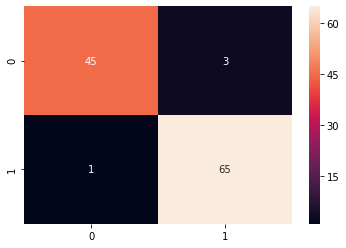

In [91]:
y_pred2 = grid.predict(x_test)

cf2 = confusion_matrix(y_test,y_pred2)

sns.heatmap(cf2, annot=True)

plt.show()